# Ejercicio 1: Preparar el ambiente de trabajo

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10, 6)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('breast_cancer.csv').drop(columns={'id', 'Unnamed: 32'}, axis=1)

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
print('Cantidad de datos perdidos','\n')
for data in df.columns:
    print(data,':\n',df[data].isna().value_counts(),'\n','-'*40)

Cantidad de datos perdidos 

diagnosis :
 False    569
Name: diagnosis, dtype: int64 
 ----------------------------------------
radius_mean :
 False    569
Name: radius_mean, dtype: int64 
 ----------------------------------------
texture_mean :
 False    569
Name: texture_mean, dtype: int64 
 ----------------------------------------
perimeter_mean :
 False    569
Name: perimeter_mean, dtype: int64 
 ----------------------------------------
area_mean :
 False    569
Name: area_mean, dtype: int64 
 ----------------------------------------
smoothness_mean :
 False    569
Name: smoothness_mean, dtype: int64 
 ----------------------------------------
compactness_mean :
 False    569
Name: compactness_mean, dtype: int64 
 ----------------------------------------
concavity_mean :
 False    569
Name: concavity_mean, dtype: int64 
 ----------------------------------------
concave points_mean :
 False    569
Name: concave points_mean, dtype: int64 
 ----------------------------------------
symm

In [6]:
# 1 es B, 0 es M
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [1, 0])

In [7]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Ejercicio 2: Visualizando la distribución de los atributos

In [8]:
df.diagnosis.unique()

array([0, 1], dtype=int64)

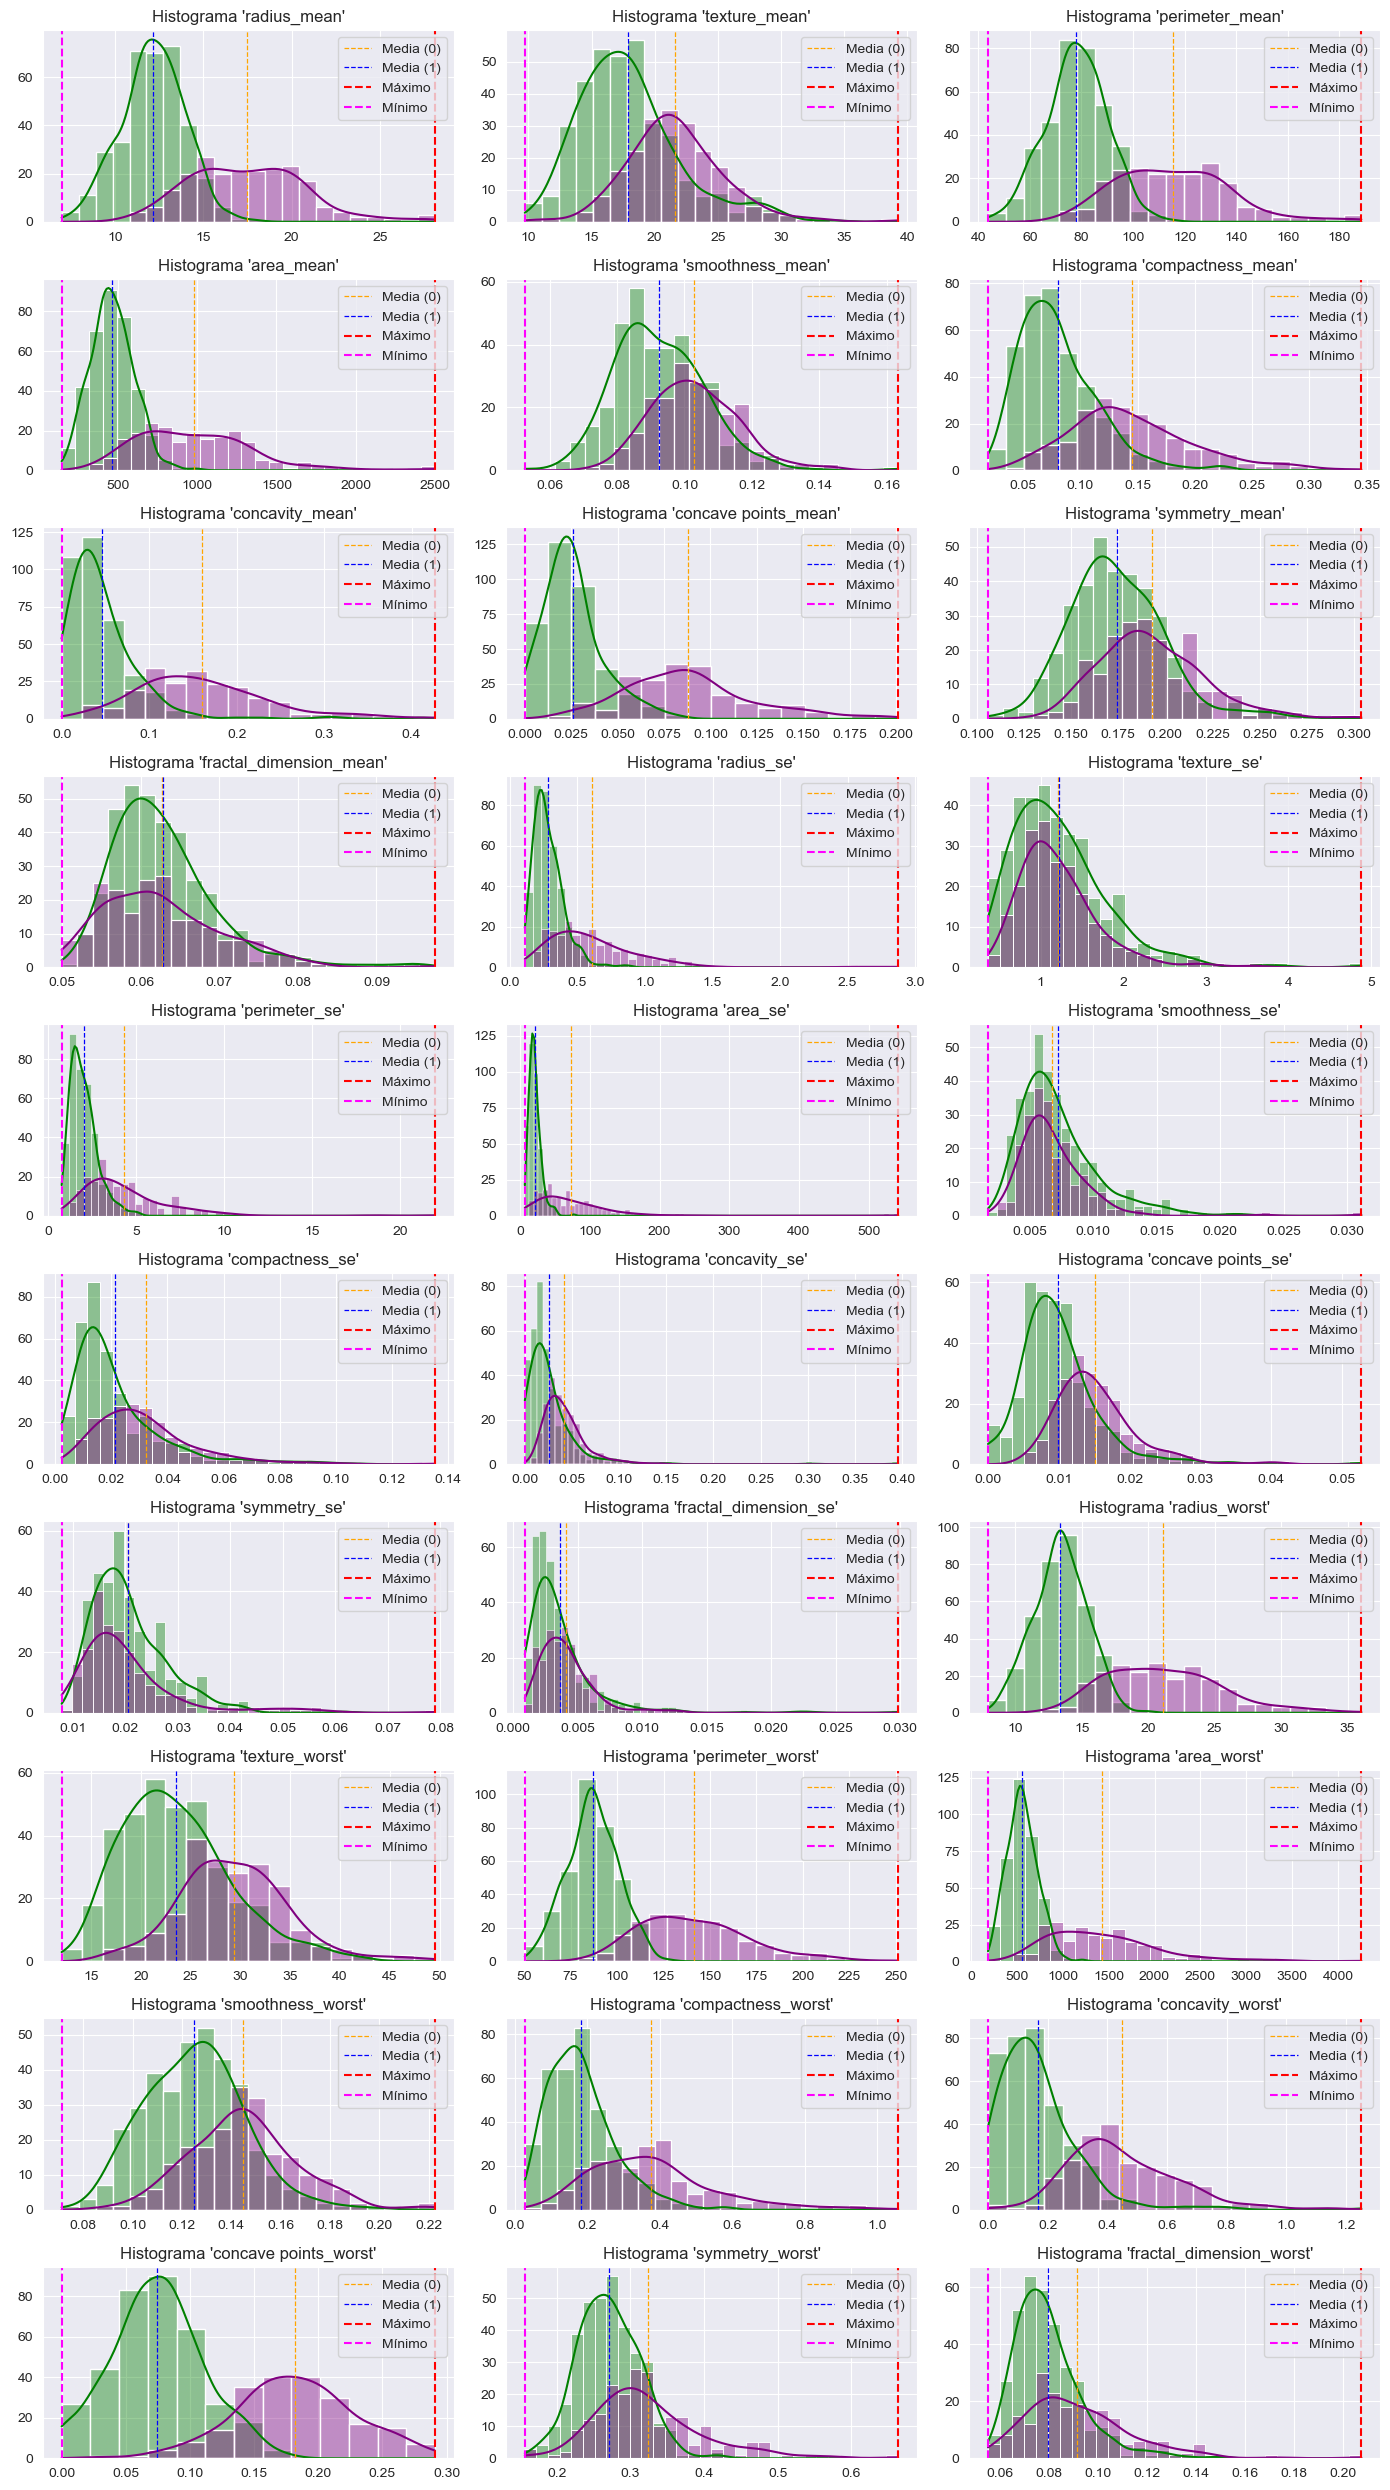

In [9]:
plt.figure(figsize=(14, 25))
colors_graph = ['purple', 'green']
colors_xline = ['orange', 'blue']
palette = sns.color_palette(colors_graph)

for index, value in enumerate(df.drop(columns='diagnosis', axis=1).columns):
    plt.subplot(10, 3, index + 1)
    sns.histplot(x=df[value], hue=df['diagnosis'], kde=True, alpha=.4, palette=palette)
    
    # Agregar dos axvline para cada diagnóstico
    for i, diagnosis in enumerate(df['diagnosis'].unique()):
        diagnosis_mean = df[df['diagnosis'] == diagnosis][value].mean()
        plt.axvline(diagnosis_mean, color=colors_xline[i], linestyle='--', label=f'Media ({diagnosis})', lw=.9)
    
    plt.axvline(df[value].max(), color='red', linestyle='--', label='Máximo')
    plt.axvline(df[value].min(), color='magenta', linestyle='--', label='Mínimo')
    plt.legend(loc='upper right')
    plt.title(f"Histograma '{value}'")
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()


    Al observar la distribución de los atributos se nota una similitud de las siguientes variables:
    - smoothness_mean
    - fractal_dimension_mean
    - texture_se
    - smoothness_se
    - compactness_se
    - symmetry_se
    - fractal_dimension_se

# Ejercicio 3: Estimando el porcentaje de overlap en los atributos

In [10]:
# funcion dada en el desafío
def histogram_overlap(df, atributo, target, perc=100):

    # get lower bound
    empirical_lower_bound = np.floor(df[atributo].min())

    # get upper bound
    empirical_upper_bound = np.ceil(df[atributo].max())

    # preserve histograms
    tmp_hist_holder = dict()

    # for each target class
    for unique_value in np.unique(df[target]):
        # get histogram
        tmp, _ = np.histogram(
        # for a specific atributo define percentage, limit empirical range for comparison
        df[df[target] == unique_value][atributo], bins=perc, range=[empirical_lower_bound, empirical_upper_bound])

        # append to dict
        tmp_hist_holder["h_"+str(unique_value)] = tmp

    get_minima = np.minimum(tmp_hist_holder["h_1"], tmp_hist_holder["h_0"])
    intersection = np.true_divide(np.sum(get_minima), np.sum(tmp_hist_holder["h_0"]))

    return intersection

In [11]:
# guardo en una lista los valores de la comunalidad de cada atributo
list_overlap= []
for col in df.drop(columns='diagnosis', axis=1).columns:
    list_overlap.append(histogram_overlap(df=df, atributo=col, target='diagnosis', perc=100))

In [12]:
# convierto la lista de atributos y comunalidad a dataframe y los concateno
cols = pd.DataFrame(df.drop(columns='diagnosis', axis=1).columns)
overlap = pd.DataFrame(list_overlap)
overlap_df = pd.concat([cols, overlap], axis=1)

# renombro las columnas
overlap_df.columns = ['Atributo', 'Comunalidad']

# ordeno de mayor a menor los valores
overlap_df = overlap_df.sort_values(by='Comunalidad',ascending=False)

In [13]:
overlap_df

,Atributo,Comunalidad
19,fractal_dimension_se,1.000000
14,smoothness_se,0.995283
9,fractal_dimension_mean,0.990566
18,symmetry_se,0.957547
11,texture_se,0.924528
15,compactness_se,0.882075
4,smoothness_mean,0.877358
8,symmetry_mean,0.858491
17,concave points_se,0.853774
29,fractal_dimension_worst,0.830189


# Ejercicio 4: Selección del modelo por GridSearchCV

### Entrene una serie de modelos SVC con los siguientes hiper parámetros:
    ○ C: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000].
    ○ gamma: [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10].
    ○ Validaciones cruzadas: 10.

In [14]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(df.drop('diagnosis', axis=1))

# muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, df['diagnosis'], random_state=94, test_size=.33)

In [15]:
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

def svc_models(kernel):
    grid = {
        'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'gamma' : [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    }

    model_grid = GridSearchCV(
        estimator=SVC(kernel=kernel),
        param_grid=grid,
        cv=10,
        verbose=5,
        n_jobs=-1
    )
    return model_grid

    rbf_model

In [16]:
rbf_model = svc_models(kernel='rbf')
rbf_model.fit(X_train, y_train)
rbf_model

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=5)

    heatmap

<Axes: xlabel='param_gamma', ylabel='param_C'>

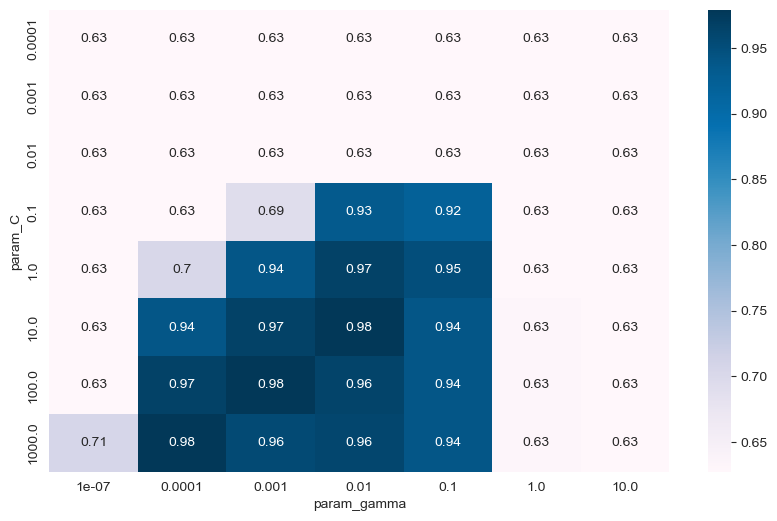

In [17]:
# Extraer los resultados del grid search en un DataFrame
results = pd.DataFrame(rbf_model.cv_results_)
cols = ['param_C', 'param_gamma', 'mean_test_score']
pivot = pd.pivot_table(results, values='mean_test_score', index='param_C', columns='param_gamma')

sns.heatmap(pivot, annot=True, cmap='PuBu')

### Reporte en qué rango de cada hiper parámetro el modelo presenta un desempeño eficiente. Reporte la mejor combinación de hiper parámetros y el desempeño en la muestra de entrenamiento.

In [18]:
print("Best parameters:", rbf_model.best_params_)
print("Best score:", rbf_model.best_score_)

Best parameters: {'C': 10, 'gamma': 0.01}
Best score: 0.9790148448043186


# Ejercicio 5: Validación del modelo en el Test set sample

In [602]:
yhat = rbf_model.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [603]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.97      0.99      0.98       118

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



    Según las métricas, el modelo tiene un buen desempeño en todos los casos.

# Ejercicio (opcional): Depuración de atributos

### Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.

In [604]:
overlap_45_low = overlap_df[overlap_df['Comunalidad'] < .45]
overlap_45_low

,Atributo,Comunalidad
26,concavity_worst,0.358491
13,area_se,0.349057
0,radius_mean,0.311321
6,concavity_mean,0.306604
3,area_mean,0.301887
2,perimeter_mean,0.283019
27,concave points_worst,0.235849
7,concave points_mean,0.231132
20,radius_worst,0.226415
22,perimeter_worst,0.216981


In [605]:
list_45_low = overlap_45_low['Atributo'].tolist()
list_45_low

['concavity_worst',
 'area_se',
 'radius_mean',
 'concavity_mean',
 'area_mean',
 'perimeter_mean',
 'concave points_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [606]:
X_45 = StandardScaler().fit_transform(df.loc[:, list_45_low])

# muestras de entrenamiento y validación
X_train_45, X_test_45, y_train_45, y_test_45 = train_test_split(X_45, df['diagnosis'], random_state=94, test_size=.33)

In [607]:
# modelo depurado
rbf_model_45_low = svc_models(kernel='rbf')
rbf_model_45_low.fit(X_train_45, y_train_45)
rbf_model_45_low

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=5)

### Reporte el desempeño del modelo y comente sobre los nuevos hiper parámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [608]:
print("Best parameters:", rbf_model_45_low.best_params_)
print("Best score:", rbf_model_45_low.best_score_)

Best parameters: {'C': 1000, 'gamma': 0.001}
Best score: 0.9474358974358974


In [609]:
yhat_45_low = rbf_model_45_low.predict(X_test_45)
yhat_45_low

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [610]:
print(classification_report(y_test, yhat_45_low))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.96      0.95      0.95       118

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



    Al realizar la depuración del modelo se obtuvieron otros hiperparámetros. En este caso fueron {'C': 1000, 'gamma': 0.001}, esto indica una alta regularización y un ancho de banda del kernel más amplio.
    A partir de los resultados de classification_report, es posible concluir que el primer modelo tiene un mejor desempeño general que el segundo modelo, ya que tiene todos sus puntajes ponderados son más altos. Sin embargo, el segundo modelo también tiene un desempeño muy bueno, siendo unos pocos puntos porcentuales más bajos que el primer modelo.